<a href="https://colab.research.google.com/github/erendagasan/Eren-Dagasan-Personal/blob/main/ARIMA-14.09.2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pmdarima

In [56]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import yfinance as yf

stock = "CANTE.IS"

dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
stock_data = yf.download(stock, start="2006-01-01", end="2023-09-14")

df_close = stock_data['Close']
df_log = np.log(df_close)
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]

model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',
                      max_p=3, max_q=3,
                      m=1,
                      d=None,
                      seasonal=False,
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)

best_order = model_autoARIMA.order
print("Best ARIMA Order:", best_order)

[*********************100%%**********************]  1 of 1 completed
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1874.677, Time=0.19 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1898.298, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1897.463, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1868.751, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-1896.513, Time=0.27 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1897.312, Time=0.52 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1894.323, Time=0.49 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-1895.331, Time=0.16 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 2.122 seconds
Best ARIMA Order: (1, 1, 0)


In [57]:
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime, timedelta

start="2023-08-28"
end="2023-09-11"

stock_data = yf.download(stock, start=start, end=end, progress=False)
new_date_index = stock_data.index + pd.Timedelta(days=(pd.Timestamp(end)-pd.Timestamp(start)+pd.Timedelta(1)).days)
model = ARIMA(np.log(stock_data["Close"]), order=best_order)
fitted = model.fit()

print(len(stock_data))

9


FİYAT:  19.19 TL

ÜST PROJEKSİYON:  22.88 TL
ALT PROJEKSİYON:  15.61 TL

Günlük AL noktası:  16.65 TL


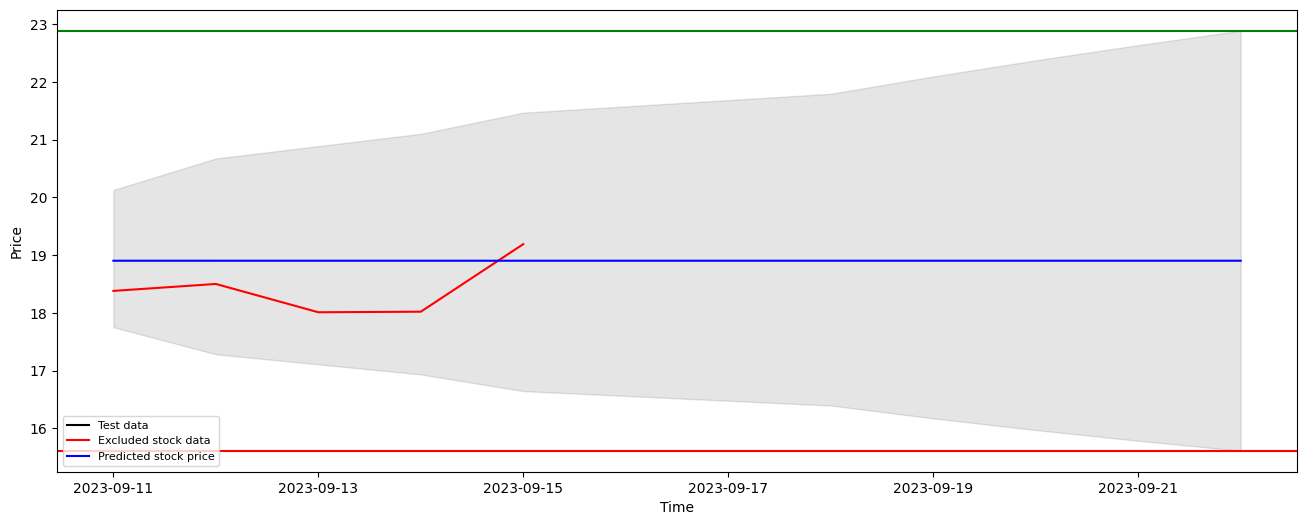

In [58]:
forecast_results = fitted.get_forecast(steps=len(stock_data), alpha=0.05)

fc = forecast_results.predicted_mean
conf = forecast_results.conf_int()

fc_series = pd.Series(fc, index=stock_data.index)
lower_series = pd.DataFrame([new_date_index,conf.iloc[:, 0]]).T
# upper_series = pd.Series(stock_data.index, conf.iloc[:, 1])

plt.figure(figsize=(16,6), dpi=100)
# plt.plot(np.exp(train_data[3500:]), label='Training data', color="black")
plt.plot(np.exp(test_data[100:]), color='black', label='Test data')

# plt.plot(test_data.index, np.exp(fc), color='orange', label='Predicted Stock Price')  # Convert back to original scale
# plt.fill_between(test_data.index, np.exp(conf.iloc[:, 0]), np.exp(conf.iloc[:, 1]),
#                  color='k', alpha=.10)


from datetime import datetime, timedelta
today = datetime.now()
tomorrow = today + timedelta(days=1)
formatted_date = tomorrow.strftime("%Y-%m-%d")
today = today.strftime("%Y-%m-%d")

stock_data = yf.download(stock, start=end, end=formatted_date, progress=False)
plt.plot(stock_data.index, stock_data["Close"], color='red', label='Excluded stock data')

plt.plot(new_date_index, np.exp(fc), color='blue', label='Predicted stock price')  # Convert back to original scale
plt.fill_between(new_date_index, np.exp(conf.iloc[:, 0]), np.exp(conf.iloc[:, 1]),
                 color='k', alpha=.10)

plt.axhline(np.exp(conf.iloc[:, 1].max()), color="green")
plt.axhline(np.exp(conf.iloc[:, 0].min()), color="red")

print("FİYAT: ", round(stock_data["Close"].iloc[-1], 2), "TL\n")

print("ÜST PROJEKSİYON: ", round(np.exp(conf.iloc[:, 1].max()), 2), "TL")
print("ALT PROJEKSİYON: ", round(np.exp(conf.iloc[:, 0].min()), 2), "TL\n")

print("Günlük AL noktası: ", round(np.exp(float(lower_series[1][lower_series[0] == pd.Timestamp(today)])), 2), "TL")

plt.xlabel('Time')
plt.ylabel('Price')

plt.legend(loc='lower left', fontsize=8)
plt.show()

In [ ]:
model = ARIMA(train_data, order=best_order)
fitted = model.fit()

forecast_results = fitted.get_forecast(steps=len(test_data), alpha=0.05)

fc = forecast_results.predicted_mean
conf = forecast_results.conf_int()

fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf.iloc[:, 0], index=test_data.index)
upper_series = pd.Series(conf.iloc[:, 1], index=test_data.index)

plt.figure(figsize=(16,6), dpi=100)
plt.plot(np.exp(train_data[1000:]), label='Training data', color="black")
plt.plot(np.exp(test_data), color='blue', label='Test data')

plt.plot(test_data.index, np.exp(fc), color='orange', label='Predicted Stock Price')  # Convert back to original scale
plt.fill_between(test_data.index, np.exp(conf.iloc[:, 0]), np.exp(conf.iloc[:, 1]),
                 color='k', alpha=.10)


plt.axhline(np.exp(conf.iloc[:, 1].max()), color="green")
plt.axhline(np.exp(conf.iloc[:, 0].min()), color="red")

plt.xlabel('Time')
plt.ylabel('Price')

plt.legend(loc='lower left', fontsize=8)
plt.show()

In [ ]:
# report performance
mse = mean_squared_error(test_data, fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc.to_numpy() - test_data)/np.abs(test_data))
print('MAPE: '+str(mape))

MSE: 0.2674679937215887
MAE: 0.4483644851402625
RMSE: 0.5171730790766169
MAPE: 0.08581938413187133


In [ ]:
import requests
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import yfinance as yf

# market = []

# url = f"https://tr.tradingview.com/symbols/BIST-XU100/components/"
# response = requests.get(url)

# if response.status_code == 200:
#   soup = BeautifulSoup(response.text, 'html.parser')
#   elements = soup.find_all(class_="apply-common-tooltip tickerNameBox-GrtoTeat tickerName-GrtoTeat")

#   for element in elements:
#     text = element.get_text()
#     market.append(text)

# nasdaq100 = ['MARA', 'AAPL', 'MSFT', 'GOOGL', 'GOOG', 'AMZN',
#              'NVDA', 'TSLA', 'META', 'AVGO', 'ASML',
#              'PEP', 'COST', 'ADBE', 'AZN', 'CSCO',
#              'NFLX', 'AMD', 'CMCSA', 'TMUS', 'TXN',
#              'QCOM', 'HON', 'INTU', 'INTC', 'SNY',
#              'VZ', 'AMGN', 'SBUX', 'ISRG', 'AMAT',
#              'BKNG', 'ADI', 'MDLZ', 'PDD', 'GILD',
#              'ADP', 'VRTX', 'ABNB', 'LRCX', 'PYPL',
#              'REGN', 'EQIX', 'MU', 'CSX', 'SNPS',
#              'CME', 'CDNS', 'KLAC', 'NTES']

sheet_id = "1RSqOXkFTAO7g4H9LEY3d3IX6H6bJaYk1"
sheet_name = "Sheet_1"
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"
result_df = pd.read_csv(url)

bist_best_orders = pd.DataFrame()

for stock in result_df["STOCK"].unique():
  try:
    print(stock)
    dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
    stock_data = yf.download(stock, start="2006-01-01", end="2023-09-14", progress=False)

    df_close = stock_data['Close']
    df_log = np.log(df_close)
    train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]

    model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                          test='adf',
                          max_p=3, max_q=3,
                          m=1,
                          d=None,
                          seasonal=False,
                          start_P=0,
                          D=0,
                          trace=False,
                          error_action='ignore',
                          suppress_warnings=True,
                          stepwise=True)

    best_order = model_autoARIMA.order

    bist_best_orders = pd.concat([bist_best_orders, pd.DataFrame([[stock, best_order]], columns=["STOCK", "BEST ORDER"])])

    print("Best param search is done. \n")
    # print("Best ARIMA Order:", best_order)

    start="2023-08-28"
    end="2023-09-11"

    stock_data = yf.download(stock, start=start, end=end, progress=False)
    new_date_index = stock_data.index + pd.Timedelta(days=(pd.Timestamp(end)-pd.Timestamp(start)+pd.Timedelta(1)).days)
    model = ARIMA(np.log(stock_data["Close"]), order=best_order)
    fitted = model.fit()

    # print(len(stock_data))

    forecast_results = fitted.get_forecast(steps=len(stock_data), alpha=0.05)

    fc = forecast_results.predicted_mean
    conf = forecast_results.conf_int()

    fc_series = pd.Series(fc, index=stock_data.index)
    lower_series = pd.DataFrame([new_date_index, conf.iloc[:, 0]]).T

    from datetime import datetime, timedelta
    today = datetime.now()
    tomorrow = today + timedelta(days=1)
    formatted_date = tomorrow.strftime("%Y-%m-%d")
    today = today.strftime("%Y-%m-%d")

    stock_data = yf.download(stock, start="2023-09-01", end="2023-09-15", progress=False)

    # if (round(stock_data["Close"].iloc[-1], 2) < round(np.exp(float(lower_series[1][lower_series[0] == pd.Timestamp(today)])), 2)) or (round(np.exp(conf.iloc[:, 1].max()), 2) > 2*(round(np.exp(conf.iloc[:, 0].min()), 2))) or (np.exp(fc.max() > round(stock_data["Close"].iloc[-1], 2))):

    if (round(stock_data["Close"].iloc[-1], 2) < round(np.exp(float(lower_series[1][lower_series[0] == pd.Timestamp(today)])), 2)) or (round(np.exp(conf.iloc[:, 1].max()), 2) > 3*(round(np.exp(conf.iloc[:, 0].min()), 2))) or (np.exp(fc.max()) > 1.2*round(stock_data["Close"].iloc[-1], 2)):
      print("****************",stock,"****************", "\n")
  except:
    pass

AKBNK.IS
Best param search is done. 

AKSEN.IS
Best param search is done. 

ALARK.IS
Best param search is done. 

ARCLK.IS
Best param search is done. 

ASELS.IS
Best param search is done. 

BIMAS.IS
Best param search is done. 

EKGYO.IS
Best param search is done. 

ENKAI.IS
Best param search is done. 

EREGL.IS
Best param search is done. 

FROTO.IS
Best param search is done. 

GARAN.IS
Best param search is done. 

GUBRF.IS
Best param search is done. 

HEKTS.IS
Best param search is done. 

KRDMD.IS
Best param search is done. 

KCHOL.IS
Best param search is done. 

KOZAL.IS
Best param search is done. 

KOZAA.IS
Best param search is done. 

ODAS.IS
Best param search is done. 

**************** ODAS.IS **************** 

PGSUS.IS
Best param search is done. 

SAHOL.IS
Best param search is done. 

SASA.IS
Best param search is done. 

PETKM.IS
Best param search is done. 

SISE.IS
Best param search is done. 

TAVHL.IS
Best param search is done. 

THYAO.IS
Best param search is done. 

TUPRS.IS


In [ ]:
import requests
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import yfinance as yf

# market = []

# url = f"https://tr.tradingview.com/symbols/BIST-XU100/components/"
# response = requests.get(url)

# if response.status_code == 200:
#   soup = BeautifulSoup(response.text, 'html.parser')
#   elements = soup.find_all(class_="apply-common-tooltip tickerNameBox-GrtoTeat tickerName-GrtoTeat")

#   for element in elements:
#     text = element.get_text()
#     market.append(text)

# nasdaq100 = ['MARA', 'AAPL', 'MSFT', 'GOOGL', 'GOOG', 'AMZN',
#              'NVDA', 'TSLA', 'META', 'AVGO', 'ASML',
#              'PEP', 'COST', 'ADBE', 'AZN', 'CSCO',
#              'NFLX', 'AMD', 'CMCSA', 'TMUS', 'TXN',
#              'QCOM', 'HON', 'INTU', 'INTC', 'SNY',
#              'VZ', 'AMGN', 'SBUX', 'ISRG', 'AMAT',
#              'BKNG', 'ADI', 'MDLZ', 'PDD', 'GILD',
#              'ADP', 'VRTX', 'ABNB', 'LRCX', 'PYPL',
#              'REGN', 'EQIX', 'MU', 'CSX', 'SNPS',
#              'CME', 'CDNS', 'KLAC', 'NTES']

order_df = pd.read_csv("bist100_best_orders.csv")

for stock in order_df["STOCK"].unique():
  try:
    print(stock)
    best_order = order_df[order_df["STOCK"] == stock]["BEST ORDER"]
    print("Best param retrieval is done. \n")

    start="2023-08-28"
    end="2023-09-11"

    stock_data = yf.download(stock, start=start, end=end, progress=False)
    new_date_index = stock_data.index + pd.Timedelta(days=(pd.Timestamp(end)-pd.Timestamp(start)+pd.Timedelta(1)).days)
    model = ARIMA(np.log(stock_data["Close"]), order=best_order)
    fitted = model.fit()

    forecast_results = fitted.get_forecast(steps=len(stock_data), alpha=0.05)

    fc = forecast_results.predicted_mean
    conf = forecast_results.conf_int()

    fc_series = pd.Series(fc, index=stock_data.index)
    lower_series = pd.DataFrame([new_date_index, conf.iloc[:, 0]]).T

    from datetime import datetime, timedelta
    today = datetime.now()
    tomorrow = today + timedelta(days=1)
    formatted_date = tomorrow.strftime("%Y-%m-%d")
    today = today.strftime("%Y-%m-%d")

    stock_data = yf.download(stock, start="2023-09-01", end="2023-09-15", progress=False)

    # if (round(stock_data["Close"].iloc[-1], 2) < round(np.exp(float(lower_series[1][lower_series[0] == pd.Timestamp(today)])), 2)) or (round(np.exp(conf.iloc[:, 1].max()), 2) > 2*(round(np.exp(conf.iloc[:, 0].min()), 2))) or (np.exp(fc.max() > round(stock_data["Close"].iloc[-1], 2))):

    if (round(stock_data["Close"].iloc[-1], 2) < round(np.exp(float(lower_series[1][lower_series[0] == pd.Timestamp(today)])), 2)) or (round(np.exp(conf.iloc[:, 1].max()), 2) > 3*(round(np.exp(conf.iloc[:, 0].min()), 2))) or (np.exp(fc.max()) > 1.2*round(stock_data["Close"].iloc[-1], 2)):
      print("****************",stock,"****************", "\n")
  except:
    pass